In [1]:
import tabula
from tabula import read_pdf
import os
import pandas as pd
import tika
from tika import parser
import string
import pickle as pkl
import matplotlib.pyplot as plt
import re
import geopandas

In [2]:
def word_to_index(h):
    H=h
    for a in h:
        if a=='circoscrizione':
            H[h.index(a)]='circ'
        if a =='Coppieconfigli':
            H[h.index(a)]='ccf'
        if a == 'Coppiesenzafigli':
            H[h.index(a)]='csf'
        if a == 'Monogenitori':
            H[h.index(a)]='mono'
        if a == 'Personesole':
            H[h.index(a)]='ps'
        if a =='Altretipologie':
            H[h.index(a)]='at'
        if a=='Totalefamiglie':
            H[h.index(a)]='total'
    return H

In [32]:
#For years up to 2011
year=2010
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
    
for a,i in enumerate(df.iloc[0]):
    if len(i.split(' '))!=1:
        print zip(re.findall('[A-Z][a-z]*',header[a].replace(' ', '')),i.split(' '))
        df=df.join(pd.DataFrame(df[header[a]].str.split(' ',1).tolist(),
                                   columns = re.findall('[A-Z][a-z]*',header[a].replace(' ', ''))))
        df=df.drop(header[a],axis=1)

header=[t.replace(' ','') for t in df.columns]
header=word_to_index(header)
df.columns=header
df

circoscrizione 1
Coppie con figli 6.576
Coppie senza figliMonogenitori 5.469 4.056
Persone sole 23.465
Altre tipologie Totale famiglie 3.495 43.061
[(u'Coppiesenzafigli', u'5.469'), (u'Monogenitori', u'4.056')]
[(u'Altretipologie', u'3.495'), (u'Totalefamiglie', u'43.061')]


,circ,ccf,ps,csf,mono,at,total
1,1,6.576,23.465,10.339,4.797,4.160,50.242
2,2,11.016,19.930,11.542,5.905,5.963,65.201
3,3,13.757,28.034,8.196,4.564,4.754,48.723
4,4,10.097,21.112,11.050,5.688,6.348,58.179
5,5,13.962,21.131,8.808,4.860,5.524,48.817
6,6,11.471,18.154,6.720,4.009,4.400,43.512
7,7,8.741,19.642,4.175,2.876,2.629,29.617
8,8,5.396,14.541,7.207,3.469,3.617,36.987
9,9,7.988,14.706,3.547,1.779,1.878,17.436
10,10,4.465,5.767,77.053,42.003,42.768,441.775


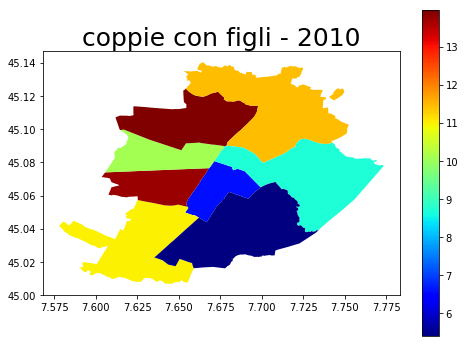

In [36]:
df_plot=geopandas.GeoDataFrame(df.drop(11).applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
ax=df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='jet', legend=True)
ax.axis='off'
ax.set_title('coppie con figli - 2010', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.savefig('CCF_2010.png')

In [20]:
os.listdir('.')

['Lagrange_Progetto',
 'todo',
 'sezioni_censimento_geo',
 'OICT',
 'Instalib.py',
 'OICT_script.ipynb',
 '.git',
 'typologies_families.ipynb',
 'ncp.py',
 'Plotter2.ipynb',
 'carta_sintesi_geo',
 'typo_famiglie',
 'matlab_export',
 'Instaplot.pyc',
 'zone_statistiche_geo',
 'TorInstagram_Git.ipynb',
 'questions_words.txt',
 'Untitled.ipynb',
 'Results',
 'Figures',
 'Twitter_scraping',
 'Housing_prices.ipynb',
 'models',
 'Plotter_py3.ipynb',
 'PKL_files',
 'Instalib.pyc',
 'microzone_censuarie_geo',
 'ncp.pyc',
 'posts_per_month',
 'replot',
 'trial_geo',
 'Instaplot.py',
 'Torino_data',
 '.ipynb_checkpoints',
 'Marseille_data',
 'Word2Vec_Instagram.ipynb',
 'CSF_2010.pdf',
 'circoscrizioni_geo',
 'Housing_prices',
 'Autocorrelations_old.ipynb',
 'Plotter.ipynb']

In [ ]:
#For years up to 2011
year=2011
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
    
for a,i in enumerate(df.iloc[0]):
    if len(i.split(' '))!=1:
        print zip(re.findall('[A-Z][a-z]*',header[a].replace(' ', '')),i.split(' '))
        df=df.join(pd.DataFrame(df[header[a]].str.split(' ',1).tolist(),
                                   columns = re.findall('[A-Z][a-z]*',header[a].replace(' ', ''))))
        df=df.drop(header[a],axis=1)

header=[t.replace(' ','') for t in df.columns]
header=word_to_index(header)
df.columns=header
df

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop(11).applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')

vmin, vmax= min(df_plot['ccf']),max(df_plot['ccf'])
print vmin, vmax
colors='pink'
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8), linewidth=1, edgecolor='black', color=(0,0,0,0))
#IP.heatmap_2(df_plot.dropna()[['ccf','geometry']],colors, smoothing=1)
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8),column='ccf'.format(i), markersize=100, ax=ax, cmap=colors,vmin=vmin,vmax=vmax)

ax.axis='off'
# add a title
ax.set_title('Coppie con figli - 2011', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Geoportale de Torino, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# add the colorbar to the figure
#cbar = plt.colorbar(sm,shrink=.5)

#IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
#
#plt.savefig(path+'Heatmaps/topic_dots_{}.pdf'.format(tvectors[i]))
#plt.savefig(path+'Heatmaps/topic_smoothed_otsu_{}.pdf'.format(tvectors[i]))

plt.show()
plt.close()

In [ ]:
def to_int(text):
    if str(text).isalpha():
        return text
    else:
        return str(int(text))

In [ ]:
def repair_data(trial, elements):
    tri=str(trial).split(' ')
    (a,b)=string.join(tri[0:2], ''), string.join(tri[2:],'')
    if b:
        if elements==2:
            return string.join([a,b],' ')
        if elements==1:
            return a+b
    else:
        return a

In [ ]:
#For years after to 2012
year=2013
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.T
header=df.iloc[0]
df=df[1:]
df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]
df.rename(index=str, columns={'Tipologia':'Circoscrizione'},inplace=True)
df.columns=[d for d in df.columns[:-1]] + [header[-1]]
for a,i in enumerate(df.iloc[0]):
    print df.columns[a],i
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        print i.split(' ')
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[j for j in i.split(' ')]).T
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)
df.index=[to_int(r) for r in df.index]
df.sort_index()

In [ ]:
df.columns=['at','ccf','csf','mono','ps','tot']

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')

In [ ]:
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']

In [ ]:
df_plot

In [ ]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
df_plot.dropna().to_crs(epsg=4326).plot(column='ccf',cmap='pink')



vmin, vmax= min(df_plot['ccf']),max(df_plot['ccf'])
print vmin, vmax
colors='pink'
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8), linewidth=1, edgecolor='black', color=(0,0,0,0))
#IP.heatmap_2(df_plot.dropna()[['ccf','geometry']],colors, smoothing=1)
ax = df_plot.dropna().to_crs(epsg=4326).plot(figsize=(8,8),column='ccf'.format(i), markersize=100, ax=ax, cmap=colors,vmin=vmin,vmax=vmax)

ax.axis='off'
# add a title
ax.set_title('Coppie con figli - 2011', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create an annotation for the data source
ax.annotate('Source: Geoportale de Torino, 2018',xy=(0.01, 1),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')

# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap=colors, norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []

# add the colorbar to the figure
#cbar = plt.colorbar(sm,shrink=.5)

#IP.geo_hm_one_2(TOP1['data{}'.format(i)].tolist(),TOP1['geometry'].tolist(),colors,'try',ax=ax,save=False,folder='',shapefile='zone_statistiche_geo/zone_statistiche_geo.shp')
#
#plt.savefig(path+'Heatmaps/topic_dots_{}.pdf'.format(tvectors[i]))
#plt.savefig(path+'Heatmaps/topic_smoothed_otsu_{}.pdf'.format(tvectors[i]))

plt.show()
plt.close()

In [ ]:
year=2014
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))

df=df.T

header=df.iloc[0]
df=df[1:]

df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]

df.dropna(inplace=True)
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
df=df.T
for col in df.columns:
    df[col]=df[col].apply(lambda x : repair_data(x,len(col.split(' '))))
df=df.T
df=df[['Altre tipologie', 'Coppie con figli', 'Coppie senza figli', 'Femmine sole', 'Maschi soli']]

for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        print i.split(' ')
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[str(j) for j in i.split(' ')]).T
        print df_add, df.columns
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)

df=df.T

df.T.sort_index().T

In [ ]:
def repair_data2(trial, elements):
    tri=str(trial).split(' ')
    (a,b)=tri[0], string.join(tri[1:],'')
    if b:
        if elements==2:
            return string.join([a,b],' ')
        if elements==1:
            return a+b
    else:
        return a

In [ ]:
def to_int2(c):
    if not str(c).isalpha():
        return int(float(str(c)))
    else:
        return c

In [ ]:
year=2015
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))

df=df.T

header=df.iloc[0]
df=df[1:]

df.rename(columns=header,inplace=True)
header=df.iloc[0]
df=df[1:]

df.dropna(inplace=True)
cols=['Circoscrizione']+df.columns[1:-1].tolist()+['Totale']
df.columns=cols
df.set_index('Circoscrizione',inplace=True)
df=df.T
for col in df.columns:
    df[col]=df[col].apply(lambda x : repair_data2(x,len(str(col).split(' '))))
df=df.T
#df=df[['Altre tipologie', 'Coppie con figli', 'Coppie senza figli', 'Femmine sole', 'Maschi soli']]

for i in df.T:
    if type(i)()!=0.0 and len(i.split(' '))>1:
        df_add=pd.DataFrame(df.T[i].str.split(' ',1).tolist(),columns=[str(j) for j in i.split(' ')]).T
        df_add.columns=df.columns
        df=df.append(df_add)
        df.drop([i],inplace=True)
df=df.T
df.columns=[to_int2(c) for c in df.columns]

In [ ]:
df

In [23]:
def to_int3(x):
    if x-int(x)!=0:
        return int(x*1000)
    else:
        return int(x)

In [ ]:
year=2016
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
df=df.T.dropna().T
df.applymap(to_int3)

In [24]:
year=2016
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
df=df.T.dropna().T
df.applymap(to_int3)
df=df.T

,1,2,3,4,5,6,7,8,Totale
Tipologia Famiglia,,,,,,,,,
Altre tipologie,1681,935,715,1160,1240,780,1970,1537,10017
Coppie con figli,6023,13442,12030,9052,12120,9992,7518,11600,81778
Coppie con figli e altri componenti,54,99,95,119,169,194,139,117,986
Coppie con figli e parenti,223,560,471,414,707,749,442,507,4073
"Coppie con figli, parenti e altri compon",9,31,28,24,46,76,55,45,314
Coppie senza figli,5289,12674,10770,7617,10310,8244,6149,10735,71791
Coppie senza figli con altri componenti,37,59,52,65,88,69,59,86,515
Coppie senza figli con paren. e altri co,2,4,12,7,14,12,2,11,64
Coppie senza figli con parenti,71,242,189,136,203,192,125,185,1343


In [28]:
df

Tipologia Famiglia,Altre tipologie,Coppie con figli,Coppie con figli e altri componenti,Coppie con figli e parenti,"Coppie con figli, parenti e altri compon",Coppie senza figli,Coppie senza figli con altri componenti,Coppie senza figli con paren. e altri co,Coppie senza figli con parenti,Femmine sole,...,Madre con figli,Madre con figli e altri componenti,Madre con figli e parenti,"Madre con figli, parenti e altri compone",Maschi soli,Padre con figli,Padre con figli e altri componenti,Padre con figli e parenti,"Padre con figli, parenti e altri compone",Totale
1,1.681,6.023,54.0,223.000,9.0,5.289,37.0,2.0,71.000,12.309,...,3.365,451.000,210.000,21.0,12.135,677.000,543.000,41.0,9.0,45.155
2,935.000,13.442,99.0,560.000,31.0,12.674,59.0,4.0,242.000,16.414,...,5.903,803.000,483.000,57.0,10.911,1.082,909.000,78.0,36.0,67.877
3,715.000,12.030,95.0,471.000,28.0,10.771,52.0,12.0,189.000,16.767,...,5.218,737.000,371.000,50.0,12.309,898.000,889.000,82.0,16.0,64.804
4,1.160,9.052,119.0,414.000,24.0,7.618,65.0,7.0,136.000,12.286,...,4.025,686.000,284.000,37.0,9.527,717.000,770.000,45.0,22.0,49.639
5,1.240,12.121,169.0,707.000,46.0,10.310,88.0,14.0,203.000,12.305,...,5.128,903.000,488.000,75.0,9.995,959.000,1.020,92.0,39.0,59.069
6,780.000,9.992,194.0,749.000,76.0,8.244,69.0,12.0,192.000,10.197,...,4.459,703.000,482.000,81.0,8.807,807.000,801.000,88.0,58.0,49.419
7,1.970,7.518,139.0,442.000,55.0,6.149,59.0,2.0,125.000,10.815,...,3.478,605.000,302.000,43.0,9.592,621.000,657.000,55.0,33.0,44.981
8,1.537,11.600,117.0,507.000,45.0,10.736,86.0,11.0,185.000,17.158,...,5.378,864.000,411.000,51.0,12.865,987.000,926.000,83.0,34.0,66.898
Totale,10.018,81.778,986.0,4.073,314.0,71.791,515.0,64.0,1.343,108.251,...,36.954,5.752,3.031,415.0,86.141,6.748,6.515,564.0,247.0,447.842


In [31]:
df_circ.set_index('NCIRCO')['geometry']

NCIRCO
1    POLYGON ((1394020.6658 4989395.456, 1394104.85...
2    POLYGON ((1388021.1388 4988598.7439, 1388221.1...
3    POLYGON ((1390109.823 4991844.4928, 1390162.00...
5    POLYGON ((1390819.53 4995807.741, 1390884.5608...
6    (POLYGON ((1400961.327 4997011.560000001, 1401...
7    POLYGON ((1395455.966 4992801.3908, 1395512.19...
8    POLYGON ((1392566.3958 4986473.023, 1392582.64...
4    POLYGON ((1390275.648 4992144.6129, 1390279.03...
Name: geometry, dtype: object

/home/eartiges/.local/lib/python2.7/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


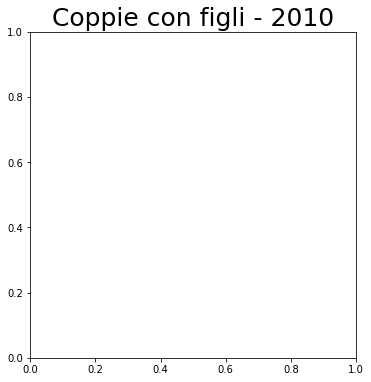

In [29]:
df_plot=geopandas.GeoDataFrame(df.drop('Totale').applymap(float))
df_circ = geopandas.read_file('circoscrizioni_geo/circoscrizioni_geo.shx')
df_plot['geometry']=df_circ.set_index('NCIRCO')['geometry']
df_plot.crs={'init':'epsg:3003'}
ax=df_plot.dropna().to_crs(epsg=4326).plot(column='Coppie con figli',cmap='jet')
ax.axis='off'
ax.set_title('Coppie con figli - 2016', fontdict={'fontsize': '25', 'fontweight' : '3'})
plt.savefig('CCF_2016.pdf')

In [ ]:
year=2017
df=read_pdf('typo_famiglie/D1{}.pdf'.format(year))
df=df.set_index('Tipologia  Famiglia')
#df=df.T.dropna().T
#df.applymap(to_int3)

In [ ]:
df